---
title: Head coach Exploratory data analysis
description: ...
---

### Imports

In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

from scipy.stats import pearsonr, pointbiserialr
from IPython.display import display, Markdown, HTML
from datetime import datetime

sns.set_style()
sns.set_theme(style = 'ticks', palette = 'pastel')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.bbox'] = 'tight'
sns.set_context("paper")

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.directory'] = 'figures'


### Loading data

In [46]:
head_coach = pd.read_csv('data/head_coach.csv', parse_dates=['appointed', 'end_date'])
head_coach.head()

,team,league,country,coach_name,staff_dob,staff_nationality,staff_nationality_secondary,appointed,end_date,days_in_post,matches,wins,draws,losses
0,Manchester City,Premier League,England,Pep Guardiola,"Jan 18, 1971",Spain,NaN,2016-07-01,NaT,2784,450,333,53,64
1,Liverpool,Premier League,England,Jürgen Klopp,"Jun 16, 1967",Germany,NaN,2015-10-08,2024-06-30,3188,468,291,96,81
2,Chelsea,Premier League,England,Graham Potter,"May 20, 1975",England,NaN,2022-09-08,2023-04-02,206,31,12,8,11
3,Chelsea,Premier League,England,Thomas Tuchel,"Aug 29, 1973",Germany,NaN,2021-01-26,2022-09-07,589,100,63,19,18
4,Chelsea,Premier League,England,Frank Lampard,"Jun 20, 1978",England,NaN,2019-07-04,2021-01-25,571,84,44,15,25


### General information about data

Data collected from match results ranges from {eval}`min_year.strftime("%m/%d/%Y")` to {eval}`max_year.strftime("%m/%d/%Y")` and contains the results of {eval}`len(match_results)` matches.

Matches have been collected for the following leagues : **{eval}`", ".join(match_results['league'].unique().tolist())`**

### Basic plots

/var/folders/7l/wwrkhf0515x8dl_scksshbc00000gn/T/ipykernel_74230/3256103280.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range('2022-01-01', '2022-12-31', freq='M').strftime('%b').tolist()


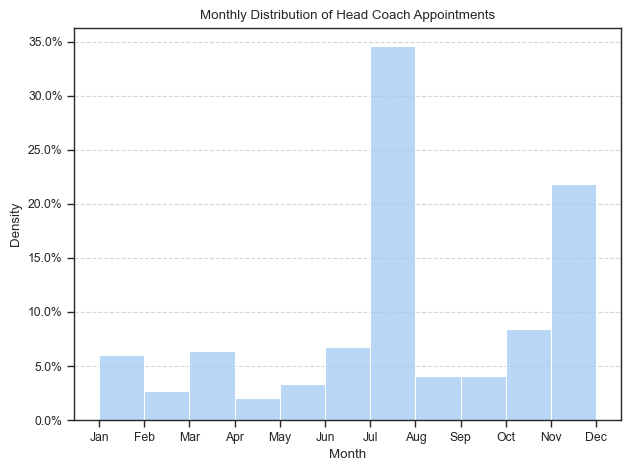

In [47]:
# Useful to add xtick months to dayofyear plot
months = pd.date_range('2022-01-01', '2022-12-31', freq='M').strftime('%b').tolist()

# Plot for Head Coach appointed distribution
plt.figure()
sns.histplot(head_coach['appointed'].dt.month, bins=11, color = 'b', kde=False, stat='density')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.xticks(range(1, 13), months)
plt.title('Monthly Distribution of Head Coach Appointments')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.savefig('figures/hc_appointment.png')

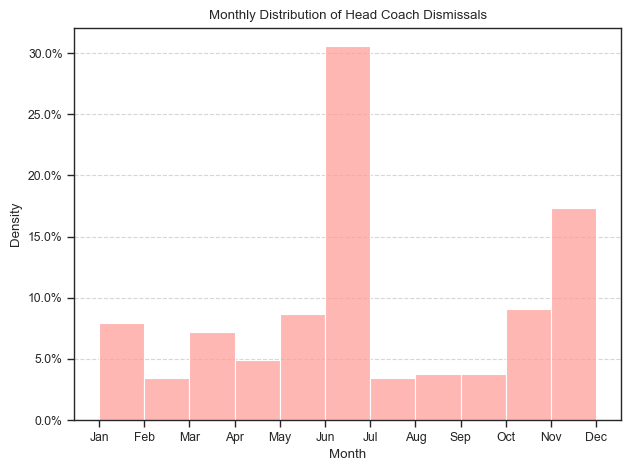

In [48]:
# Plot for Head Coach dismissal distribution
plt.figure()
sns.histplot(head_coach['end_date'].dt.month, bins=11, color = 'r', kde=False, stat='density')
plt.xticks(range(1, 13), months)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.title('Monthly Distribution of Head Coach Dismissals')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.savefig('figures/hc_dismissal.png')

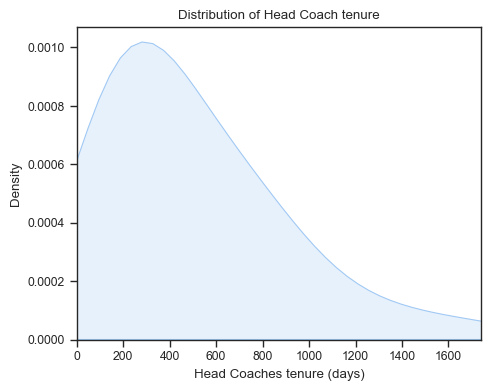

In [49]:
head_coach_dismissed = head_coach[head_coach['end_date'].notnull()]

# Plot distribution of head_coach['days_in_post'] 
plt.figure(figsize=(5, 4))
sns.kdeplot(head_coach_dismissed['days_in_post'], fill=True)
plt.xlim(0, head_coach_dismissed['days_in_post'].quantile(0.97))
plt.title('Distribution of Head Coach tenure')
plt.xlabel('Head Coaches tenure (days)')
plt.savefig('figures/hc_tenure.png')

En moyenne, les coachs sont restés en poste {eval}`round(head_coach_dismissed['days_in_post'].mean())` jours.

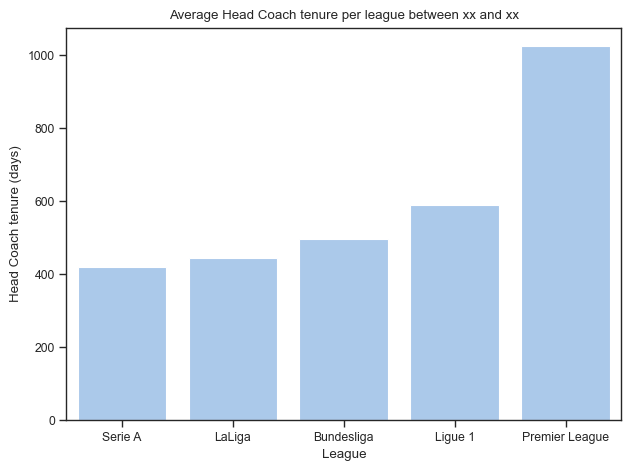

In [50]:
# Average days in post per league 

# Calculate average days in post per league
avg_days_in_post = head_coach_dismissed.groupby('league')['days_in_post'].mean()
avg_days_in_post = avg_days_in_post.sort_values()

# Plot average days in post per league
plt.figure()
sns.barplot(x=avg_days_in_post.index, y=avg_days_in_post.values)
plt.title('Average Head Coach tenure per league between xx and xx')
plt.ylabel('Head Coach tenure (days)')
plt.xlabel('League')

plt.savefig('figures/hc_tenure_per_league.png')

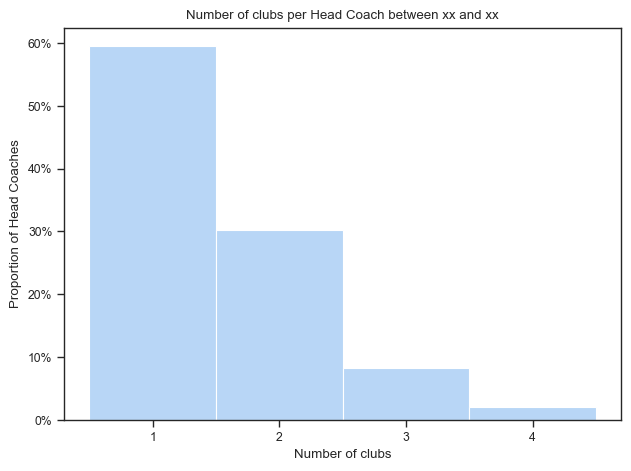

In [51]:
# Number of clubs per Head Coach

# Group by coach_name and count the number of clubs
club_per_coach = head_coach.groupby('coach_name').size().reset_index(name='count')

plt.figure()
sns.histplot(x='count', data = club_per_coach, discrete = True, stat="probability")
plt.xticks(range(1, club_per_coach['count'].max() + 1))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.title('Number of clubs per Head Coach between xx and xx')
plt.xlabel('Number of clubs')
plt.ylabel('Proportion of Head Coaches')
plt.savefig('figures/number_of_club_per_coach.png')

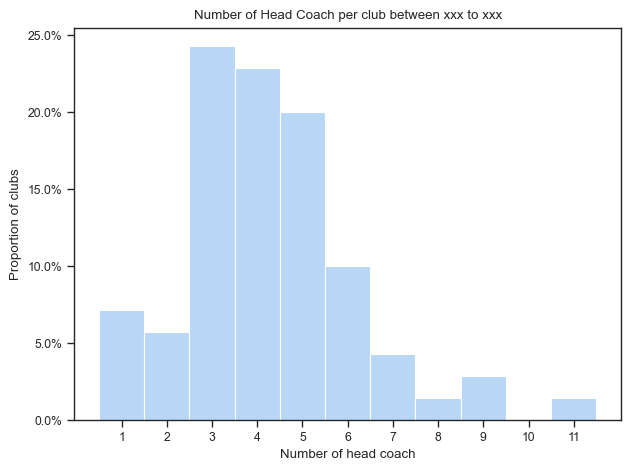

In [52]:
# Number of Head Coachs per club

# Group by team and count the number of head coach
coach_per_club = head_coach.groupby('team').size().reset_index(name='count')

plt.figure()
sns.histplot(x='count', data = coach_per_club, discrete=True, stat="probability")
plt.xticks(range(1, coach_per_club['count'].max() + 1))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.title(f'Number of Head Coach per club between xxx to xxx')
plt.xlabel('Number of head coach')
plt.ylabel('Proportion of clubs')
plt.savefig('figures/number_of_coach_per_club.png')

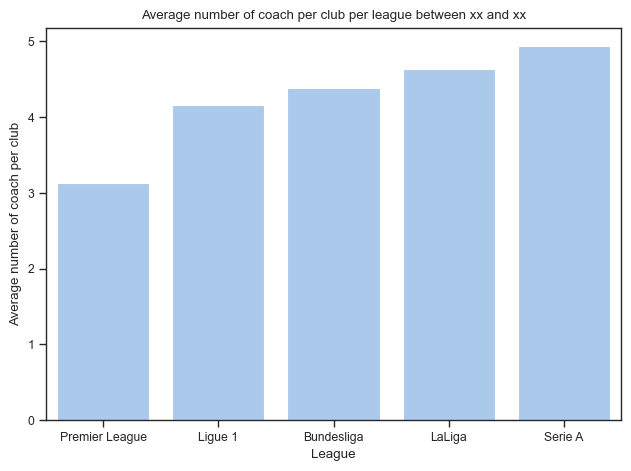

In [53]:
# Average number of coach per club per league 

# Calculate average number of coach per club per league
coach_per_team = head_coach.groupby(['league', 'team']).size()
avg_number_of_coach_per_club_per_league = coach_per_team.groupby('league').mean().sort_values()

# Plot average number of coach per club per league
plt.figure()
sns.barplot(x=avg_number_of_coach_per_club_per_league.index, y=avg_number_of_coach_per_club_per_league.values)
plt.title('Average number of coach per club per league between xx and xx')
plt.ylabel('Average number of coach per club')
plt.xlabel('League')
plt.savefig('figures/hc_per_club_per_league.png')

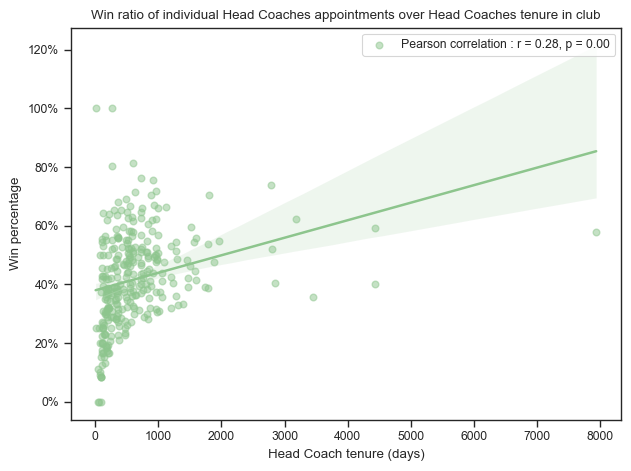

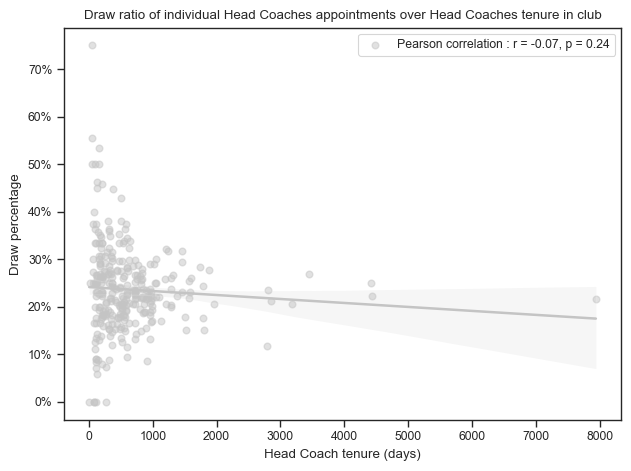

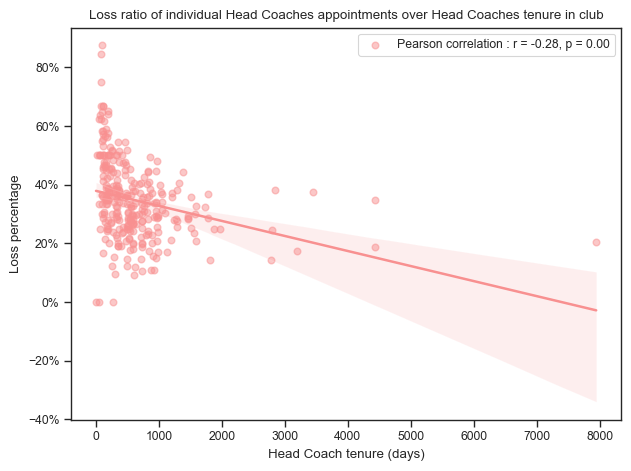

In [54]:
# Plot of wins, draw and losses percentage over days in post
head_coach['win_percentage'] = head_coach['wins'] / head_coach['matches'] * 100
head_coach['draw_percentage'] = head_coach['draws'] / head_coach['matches'] * 100
head_coach['loss_percentage'] = head_coach['losses'] / head_coach['matches'] * 100

def plot_percentage_over_days(data, y_value, y_leg, color):
    plt.figure()
    sns.regplot(x='days_in_post', y=y_value, data=data, color=sns.light_palette(color, as_cmap=True)(0.4), scatter_kws={'alpha':0.5}, label = y_leg + ' ratio')
    
    plt.title(f'{y_leg} ratio of Head Coaches appointments over Head Coaches tenure in club')
    ## x = head coach tenure in a club
    ## y = win/draw/loss ratio under the appointment of the head coach
    plt.xlabel('Head Coach tenure (days)')
    plt.ylabel(f'{y_leg.capitalize()} percentage')
    plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))

    # Calculate Pearson correlation coefficient
    r, p = pearsonr(data['days_in_post'], data[y_value])
    plt.legend([f'Pearson correlation : r = {r:.2f}, p = {p:.2f}'], loc='upper right')
    
    plt.savefig(f'figures/{y_value}_over_hc_tenure.png')

plot_percentage_over_days(head_coach, 'win_percentage', 'Win', 'green')
plot_percentage_over_days(head_coach, 'draw_percentage', 'Draw', 'gray')
plot_percentage_over_days(head_coach, 'loss_percentage', 'Loss', 'red')

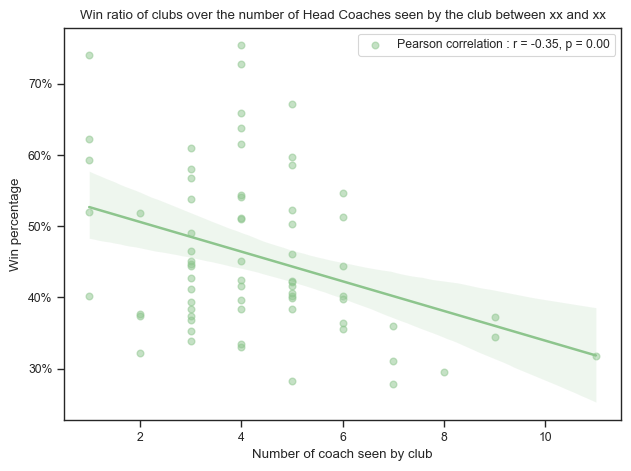

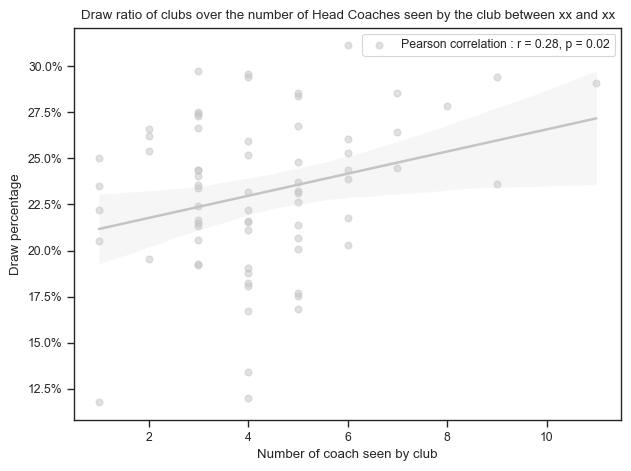

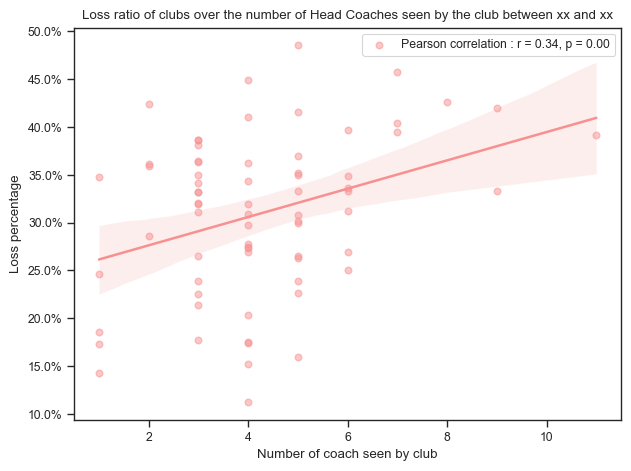

In [55]:
# Plot match outcome of clubs over number of coach seen by club

club_results = head_coach.groupby('team').agg({'wins': 'sum', 'draws': 'sum', 'losses': 'sum', 'matches': 'sum', 'coach_name': 'count'})
club_results = club_results.rename(columns={'coach_name': 'coach_count'})
club_results['win_percentage'] = club_results['wins'] / club_results['matches'] * 100
club_results['draw_percentage'] = club_results['draws'] / club_results['matches'] * 100
club_results['loss_percentage'] = club_results['losses'] / club_results['matches'] * 100

# Plot percentage over number of coach seen by club
def plot_club_outcome(data, y_value, y_leg, color):
    plt.figure()
    sns.regplot(x='coach_count', y=y_value, data=data, color=sns.light_palette(color, as_cmap=True)(0.4), scatter_kws={'alpha':0.5}, label = y_leg + ' ratio')
    # x = number of coach seen by club
    # y = win/draw/loss ratio of the club
    plt.title(f'{y_leg} ratio of clubs over the number of Head Coaches seen by the club between xx and xx')
    plt.xlabel('Number of coach seen by club')
    plt.ylabel(f'{y_leg} percentage')
    plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))

    r, p = pearsonr(data['coach_count'], data[y_value])
    plt.legend([f'Pearson correlation : r = {r:.2f}, p = {p:.2f}'], loc='upper right')
    
    plt.savefig(f'figures/{y_value}_over_club_hc_count.png')

plot_club_outcome(club_results, 'win_percentage', 'Win', 'green')
plot_club_outcome(club_results, 'draw_percentage', 'Draw', 'gray')
plot_club_outcome(club_results, 'loss_percentage', 'Loss', 'red')

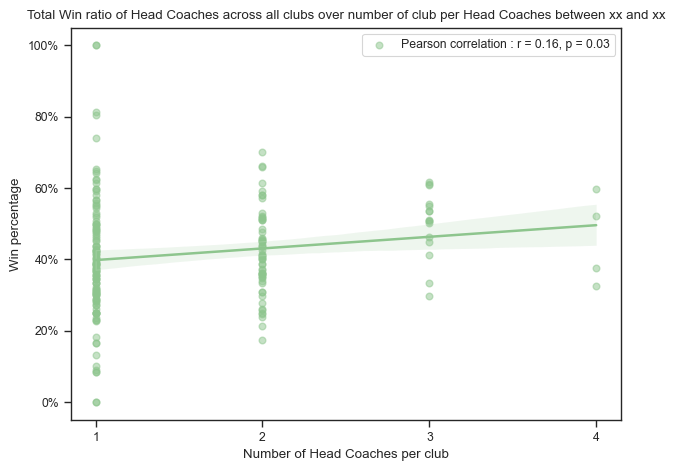

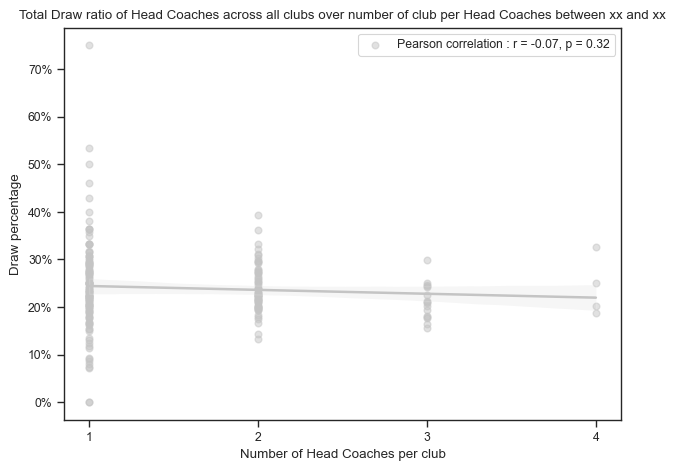

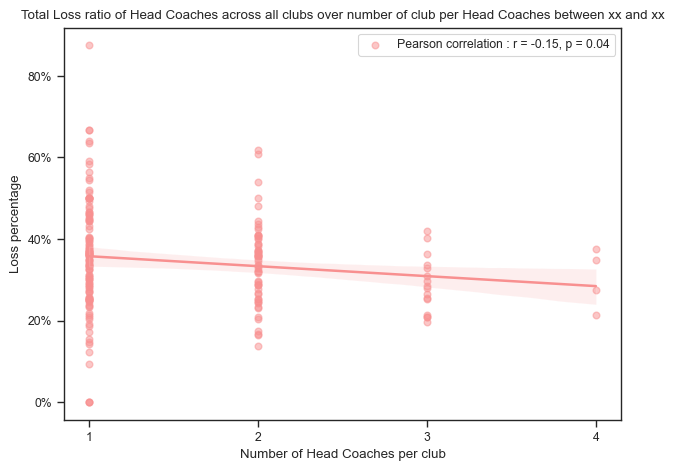

In [56]:
# Plot of wins, draw and losses percentage over number of club head coach has been

head_coach_performance = head_coach.groupby('coach_name').agg({'matches': 'sum', 'wins': 'sum', 'draws': 'sum', 'losses': 'sum', 'team': 'count'}).reset_index()
head_coach_performance = head_coach_performance.rename(columns={'team': 'club_count'})
head_coach_performance['win_percentage'] = head_coach_performance['wins'] / head_coach_performance['matches'] * 100
head_coach_performance['draw_percentage'] = head_coach_performance['draws'] / head_coach_performance['matches'] * 100
head_coach_performance['loss_percentage'] = head_coach_performance['losses'] / head_coach_performance['matches'] * 100

# Linear regression plot for wins, draw and losses percentage over number of club head coach has been

def plot_percentage_over_club_count(data, y_value, y_leg, color):
    plt.figure()
    sns.regplot(x='club_count', y=y_value, data=data, color = sns.light_palette(color, as_cmap=True)(0.4), scatter_kws={'alpha':0.5}, label = y_leg + ' ratio')
    # x = number of club head coach has been
    # y = win/draw/loss ratio of the head coach over all clubs
    plt.title(f'{y_leg.capitalize()} ratio of Head Coaches across all clubs over number of club per Head Coaches between xx and xx')
    plt.xticks(range(1, data['club_count'].max() + 1))
    plt.xlabel('Number of Head Coaches per club')
    plt.ylabel(f'{y_leg.capitalize()} percentage')
    plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))

    r, p = pearsonr(data['club_count'], data[y_value])
    plt.legend([f'Pearson correlation : r = {r:.2f}, p = {p:.2f}'], loc='upper right')
    
    plt.savefig(f'figures/{y_value}_over_club_per_hc_count.png')

plot_percentage_over_club_count(head_coach_performance, 'win_percentage', 'win', 'green')
plot_percentage_over_club_count(head_coach_performance, 'draw_percentage', 'draw', 'gray')
plot_percentage_over_club_count(head_coach_performance, 'loss_percentage', 'loss', 'red')

Il n'existe pas de relation entre l'ancienneté du coach et la performance de l'équipe.